In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('train.csv')

In [203]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###  ! A base de dados possui valores faltando !


In [207]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### 'Cabin' e 'Embarked' serão removidos, pois em 'Cabin' temos valores unicos que não vão adicionar as predições e 'Embarked' como são poucos valores serão removidos sem perder um grande percentual de dados

### Entretanto 'Age' não se encaixa nas premissas anteriores, então será necessário outra forma de 'Feature Engineering'

In [208]:
#df = df.drop(['Cabin'], axis = 1)


In [209]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Visto que as ditribuições são diferentes, os valores que faltam serão substituidos pela a idade pela mediana de sua correspondente classe assim não é perdido cerca de 20 % das informações disponíveis

<Figure size 288x144 with 0 Axes>

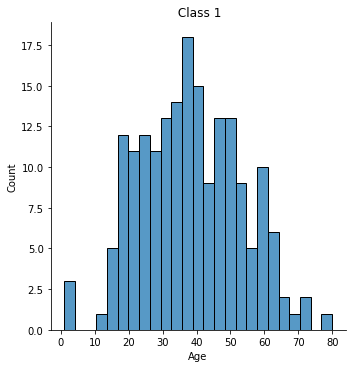

<Figure size 288x144 with 0 Axes>

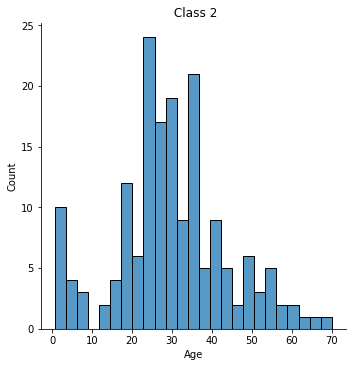

<Figure size 288x144 with 0 Axes>

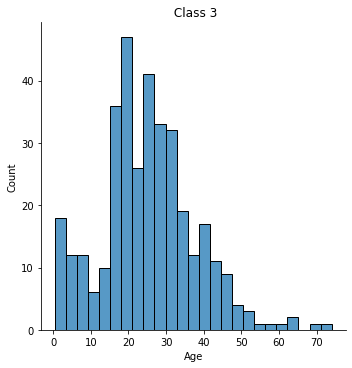

In [210]:
a = df['Pclass'].unique()
n_classes = (sorted(a))


for n in n_classes :
    plt.figure(figsize = (4,2))
    sns.displot(data = df[df['Pclass'] == n] , x = 'Age', bins = 25, multiple = 'stack')
    plt.title(' Class {}'.format(n))

In [211]:
df[df['Pclass'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [212]:
def median (classes) :
    a = []
    
    for n in classes:
        df_median = df[df['Pclass'] == n]
        a.append(df_median['Age'].median())
    return(a)    

In [213]:
medians = median(n_classes)
medians

[37.0, 29.0, 24.0]

In [214]:
df[df['Pclass'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [215]:
df_test = df

df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

df.iloc[31]

PassengerId                                                32
Survived                                                    1
Pclass                                                      1
Name           Spencer, Mrs. William Augustus (Marie Eugenie)
Sex                                                    female
Age                                                      37.0
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17569
Fare                                                 146.5208
Cabin                                                     B78
Embarked                                                    C
Name: 31, dtype: object

In [216]:
df = df.drop('Cabin', axis = 1)

In [217]:
df = df.dropna(axis = 0)

In [218]:
df.shape

(889, 11)

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Agora testando os Modelos Preditivos

In [220]:
df_ml = df.drop(['PassengerId','Name','Ticket'], axis = 1)
df_ml.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [221]:
df_wdummies = pd.get_dummies(df_ml, drop_first=True)
df_wdummies.shape

(889, 9)

In [222]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV


In [223]:
X_wdummies = df_wdummies.drop('Survived',axis=1)

X = df_wdummies.drop('Survived',axis =1)
y = df_wdummies['Survived']

X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(X_wdummies, y, test_size=0.15, random_state=505)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=505)

In [224]:
len(X)

889

In [225]:
scaler = StandardScaler()


scaled_X_wtrain =scaler.fit_transform(X_dtrain)
scaled_X_wtest = scaler.transform(X_dtest)

In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

ada_model = AdaBoostClassifier(random_state=505)
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svm_model = SVC()

In [227]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [228]:
def modeltest (model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model,X_test,y_test)
    

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        88
           1       0.79      0.72      0.75        46

    accuracy                           0.84       134
   macro avg       0.82      0.81      0.81       134
weighted avg       0.83      0.84      0.83       134



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


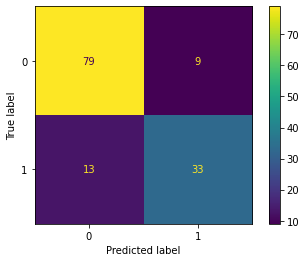

In [229]:
modeltest(log_model,scaled_X_wtrain,y_dtrain,scaled_X_wtest,y_dtest)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        88
           1       0.71      0.70      0.70        46

    accuracy                           0.80       134
   macro avg       0.78      0.77      0.78       134
weighted avg       0.80      0.80      0.80       134



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


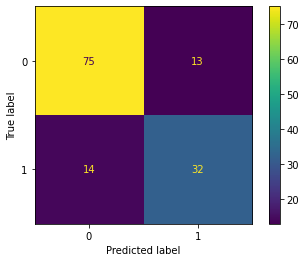

In [230]:
modeltest(knn_model,scaled_X_wtrain,y_dtrain,scaled_X_wtest,y_dtest)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.97      0.90        88
           1       0.91      0.65      0.76        46

    accuracy                           0.86       134
   macro avg       0.88      0.81      0.83       134
weighted avg       0.86      0.86      0.85       134



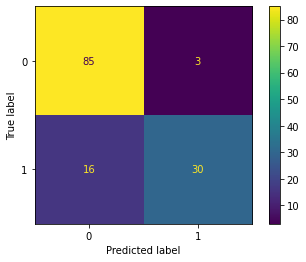

In [231]:
modeltest(svm_model,scaled_X_wtrain,y_dtrain,scaled_X_wtest,y_dtest)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        88
           1       0.78      0.78      0.78        46

    accuracy                           0.85       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.85      0.85      0.85       134



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


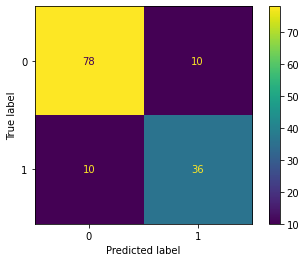

In [297]:
modeltest(ada_model,X_train,y_train,X_test,y_test)

### AdaBoosting foi escolhido como modelo mesmo perdendo por muito pouco para Suport Vector Machines, pois naturalmente Modelos de Arvores de decisões normalmente se comportam melhor dentre os modelos de classificações, são mais simples e com menos chance de dar 'overfiting' nas observações de treino.

In [244]:
error_rates = []

for n in range(1,200):
    
    model = AdaBoostClassifier(n_estimators=n,random_state=505)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

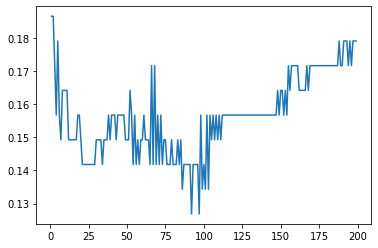

In [245]:
plt.plot(range(1,200),error_rates)

In [291]:
param_grid={'n_estimators' :np.linspace(90,100,11,dtype='int_'),
           'learning_rate': np.geomspace(0.0001, 1, num=5)}

In [303]:
final_grid = GridSearchCV(ada_model,param_grid=param_grid,scoring='accuracy')

In [304]:
final_grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=505),
             param_grid={'learning_rate': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'n_estimators': array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])},
             scoring='accuracy')

In [310]:
final_grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 91}

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        88
           1       0.80      0.78      0.79        46

    accuracy                           0.86       134
   macro avg       0.84      0.84      0.84       134
weighted avg       0.86      0.86      0.86       134



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


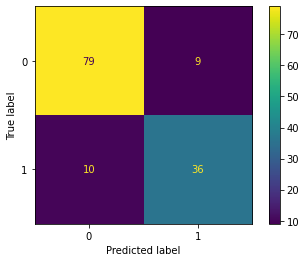

In [305]:
modeltest(final_grid,X_train,y_train,X_test,y_test)

In [313]:
final_model = AdaBoostClassifier(n_estimators=91, learning_rate=1)

In [314]:
final_model.fit(X,y)

AdaBoostClassifier(learning_rate=1, n_estimators=91)

In [315]:
final_model.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(learning_rate=1, n_estimators=91)>

In [320]:
final_model.feature_importances_

array([0.03296703, 0.24175824, 0.04395604, 0.01098901, 0.62637363,
       0.03296703, 0.        , 0.01098901])

In [319]:
feat_imp = pd.DataFrame(index=X.columns,data = final_model.feature_importances_, columns = ['Importance'] )

In [329]:
feat_imp = feat_imp.sort_values('Importance',ascending = False)

In [330]:
feat_imp

,Importance
Fare,0.626374
Age,0.241758
SibSp,0.043956
Pclass,0.032967
Sex_male,0.032967
Parch,0.010989
Embarked_S,0.010989
Embarked_Q,0.000000


### Vendo como as caracteristicas se comportam, é possível notar que 'Fare' (Valor pago para adentrar o navio) e 'Age'( Idade) influenciaram mais sobre quem sobreviveu ou não ao Titanic, sendo que 'Fare' de longe foi a mais importante.

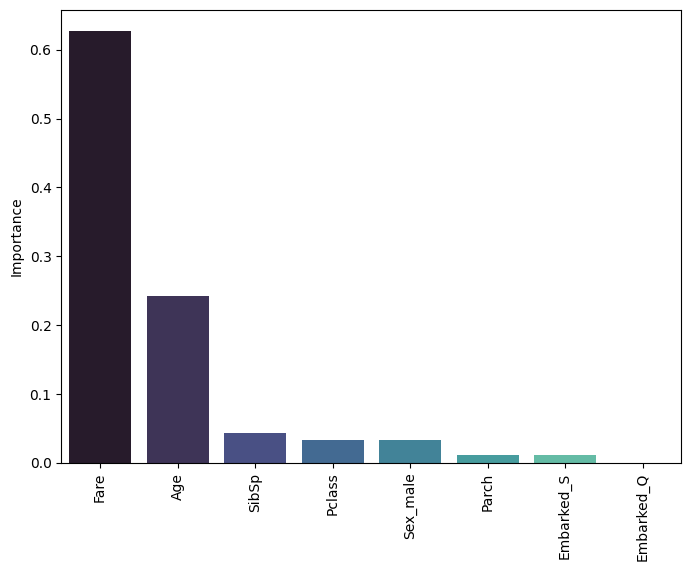

In [339]:
plt.figure(figsize= (8,6), dpi =100)
sns.barplot(data = feat_imp, x = feat_imp.index, y = 'Importance',palette = 'mako')
plt.xticks(rotation= 90);

<AxesSubplot:xlabel='Fare', ylabel='Age'>

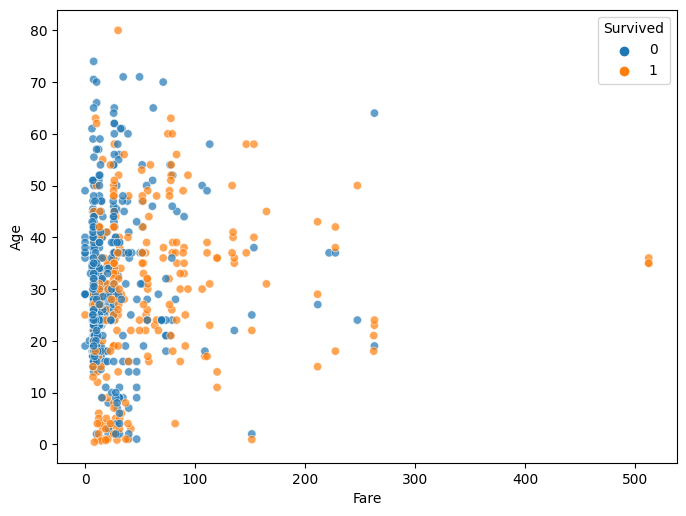

In [353]:
plt.figure(figsize=(8,6), dpi =100)
sns.scatterplot(data = df,x ='Fare', y = 'Age',hue = 'Survived',alpha = .7)

### Resultados do modelo numa base de teste

In [357]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [361]:
df_testml = df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis= 1)
df_testml.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [362]:
df_testml.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [364]:
class_ = df_testml['Pclass'].unique()
class_

array([3, 2, 1], dtype=int64)

In [367]:
class_ =(sorted(class_))
class_

[1, 2, 3]

In [368]:
median(class_)

[37.0, 29.0, 24.0]

In [371]:
df_testml['Age'] = df_testml['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))
df_testml.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [374]:
df_testml = df_testml.dropna()
df_testml.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [376]:
df_testml = pd.get_dummies(df_testml,drop_first = True)
df_testml

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,29.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,29.0,0,0,8.0500,1,0,1


In [378]:
predictions = final_model.predict(df_testml)


In [379]:
df_testml['Survived_pred']= predictions

In [380]:
df_testml

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived_pred
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,0
...,...,...,...,...,...,...,...,...,...
413,3,29.0,0,0,8.0500,1,0,1,0
414,1,39.0,0,0,108.9000,0,0,0,1
415,3,38.5,0,0,7.2500,1,0,1,0
416,3,29.0,0,0,8.0500,1,0,1,0


In [381]:
df_testml[df_testml['Fare']>100]

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived_pred
24,1,48.0,1,3,262.3750,0,0,0,1
53,1,28.0,3,2,263.0000,0,0,1,1
59,1,36.0,0,0,262.3750,0,0,0,1
64,1,13.0,2,2,262.3750,1,0,0,1
69,1,60.0,1,4,263.0000,0,0,1,1
74,1,35.0,0,0,211.5000,0,0,0,1
75,1,32.5,0,0,211.5000,1,0,0,1
81,1,67.0,1,0,221.7792,1,0,1,0
114,1,63.0,1,0,221.7792,0,0,1,1
141,1,33.0,0,0,151.5500,0,0,1,1
